*Импорт библиотек* 

*Загрузка датасета*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict

try:
    df = pd.read_csv("D:/Credit-scoring/autocredit_dataset.csv") #На ноутбуке
except:
    df = pd.read_csv("E:/Credit-scoring/autocredit_dataset.csv") #На ПК

df = df.drop(["application_id", "customer_id", "vehicle_brand", "vehicle_age", "mileage_at_issue", "snapshot_date", "issue_date", "loan_amount", "employment_type", "channel", "marital_status"], axis=1) #Удаление ненужных признаков

print(df.columns)

print(f'Количество объектов до удаления дубликатов: {len(df.index)}')
df = df.drop_duplicates()
print(f'Количество объектов после удаления дубликатов: {len(df.index)}')


# **1.Анализ данных**

**1.1 Пропущенные значения**

In [ ]:
def count_elements_in_array(array: List[str|float|int]) -> Dict:
    main_dict = {}
    for elem in array:
        try:
            main_dict[elem] += 1
        except:
            main_dict[elem] = 1
            
    return main_dict

vector_of_nan = df.isna().sum(axis=0) #Процесс суммирования происходит по строкам
index_of_missing = []

vector_of_nan_rows = df.isna().sum(axis=1) #Процесс суммирования происходит по столбцам

print("Признаки с пропущенными значениями:")
for i in vector_of_nan.index:
    if vector_of_nan[i] != 0:
        print(f'{i} : {vector_of_nan[i]}')
        index_of_missing.append(i)
print(f'''\nКоличество объектов с пропусками: 
      1 - {len(vector_of_nan_rows[vector_of_nan_rows == 1].index)} 
      2 - {len(vector_of_nan_rows[vector_of_nan_rows == 2].index)} 
      3 - {len(vector_of_nan_rows[vector_of_nan_rows == 3].index)} 
      4 - {len(vector_of_nan_rows[vector_of_nan_rows == 4].index)}''')

df_miss = df.dropna()

if len(index_of_missing) != 0:
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle("Analyze of columns with missing values", size = 18)
    fig.axes[0].set_visible(False) if fig.axes else None
    
    axes = []
    
    rows = len(index_of_missing)//2
    columns = len(index_of_missing) - len(index_of_missing)//2

    if rows == 0: rows = 1
    
    for ind in range(0, len(index_of_missing)):
        np_arr = df_miss[index_of_missing[ind]].to_numpy()
        
        if pd.api.types.is_numeric_dtype(df_miss[index_of_missing[ind]]):
            axes.append(fig.add_subplot(rows, columns, ind + 1))
            
            axes[-1].set_title(index_of_missing[ind])
            axes[-1].xaxis.set_label_text("values")
            axes[-1].yaxis.set_label_text("count")
            axes[-1].hist(np_arr, edgecolor="black")
        else:
            X = count_elements_in_array(np_arr)
            
            axes.append(fig.add_subplot(rows, columns, ind + 1))
            
            axes[-1].set_title(index_of_missing[ind])
            axes[-1].xaxis.set_label_text("values")
            axes[-1].yaxis.set_label_text("count")
            axes[-1].bar(x=list(X.keys()), height = list(X.values()), edgecolor = "black") 
    
    fig.set_visible(True) # Графики скрыты
            
print(f'''\ncustomer_income: 
      Среднее {df_miss["customer_income"].mean()}
      Медиана {df_miss["customer_income"].median()}
      Мода {df_miss["customer_income"].mode().to_numpy()}''')

print(f'''\nemployment_length_years: 
      Среднее {df_miss["employment_length_years"].mean()}
      Медиана {df_miss["employment_length_years"].median()}
      Мода {df_miss["employment_length_years"].mode().to_numpy()}''')

print(f'''\ncredit_history_length: 
      Среднее {df_miss["credit_history_length"].mean()}
      Медиана {df_miss["credit_history_length"].median()}
      Мода {df_miss["credit_history_length"].mode().to_numpy()}''')

print(f'''\naddress_region:
      Мода {df_miss["address_region"].mode().to_numpy()}''')


**1.2.1 Выбросы признаков**

In [ ]:
df_miss = df.dropna() #Иначе графики boxplot начинают шакалить

numeric_columns = [column for column in df_miss.columns if pd.api.types.is_numeric_dtype(df_miss[column])]

if len(numeric_columns) != 0:
    rows = 3 #Надоело высчитывать
    columns = 6
    
    fig = plt.figure(figsize=(40, 25))
    fig.suptitle("Analyze of boxplot's features", size = 35)
    fig.axes[0].set_visible(False) if fig.axes else None # Скрываю оси самой фигуры(fig)
    
    for ind in range(0, len(numeric_columns)):
        np_array = df_miss[numeric_columns[ind]].to_numpy()
        
        fig.add_subplot(rows, columns, ind + 1)
        fig.axes[-1].boxplot(np_array)
        fig.axes[-1].xaxis.set_label_text(numeric_columns[ind], size = 18)
        fig.axes[-1].yaxis.set_label_text('values', size = 18)

**1.2.2 Выбросы объектов**

In [ ]:
dti = df["debt_to_income_ratio"].dropna()
npd = df["num_past_default"].dropna()

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(1,1,1)
ax1.set_title("Зависимость num_past_default от dti")

ax1.scatter(x=dti.to_numpy(), y=npd.to_numpy(), c = "red", s = 5)

ax1.axvline(x=dti.quantile(0.01), color = "blue", linestyle = "--", alpha = 0.5)
ax1.axvline(x=dti.median(), color = "red", linestyle = "--", alpha = 0.5, label = "median")
ax1.axvline(x=dti.mean(), color = "green", linestyle = "--", alpha = 0.5, label = "mean")
ax1.axvline(x=dti.quantile(0.99), color = "blue", linestyle = "--", alpha = 0.5, label = "0.01 -> 0.99 quantile")

# ax1.axhline(y=npd.quantile(0.1), color = "blue", linestyle = "--", alpha = 0.5)
# ax1.axhline(y=npd.quantile(0.99), color = "blue", linestyle = "--", alpha = 0.5)

result1 = df[["debt_to_income_ratio", "num_past_default"]].query("debt_to_income_ratio <= 0.5 and num_past_default >= 2")
print(f'''Выбросы: 
{result1.head(10)}
Количество: {len(result1.index)}
       ''')

fig.legend()
fig.show()

**1.3 Матрица корреляции**

In [ ]:
all_numeric = [i for i in df.columns if pd.api.types.is_numeric_dtype(df[i])]

matrix_corr = df[all_numeric].corr()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)

im = ax.imshow(X=matrix_corr, cmap='hot')
ax.set_title("Матрица корреляции")
ax.xaxis.set_ticks(range(0,17))
ax.xaxis.set_ticklabels(matrix_corr.columns)
ax.yaxis.set_ticks(range(0,17))
ax.yaxis.set_ticklabels(matrix_corr.columns)
ax.tick_params(axis='x', labelrotation = 270)
fig.colorbar(im)
fig.show()

# **2.Обработка данных**

**2.1.1 Удаление неважных признаков** + ***импорт библиотек***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

try:
    df = pd.read_csv("D:/Credit-scoring/autocredit_dataset.csv") #На ноутбуке
except:
    df = pd.read_csv("E:/Credit-scoring/autocredit_dataset.csv") #На ПК

df = df.drop(["application_id", "customer_id", "vehicle_brand", 
              "vehicle_age", "mileage_at_issue", "snapshot_date", 
              "issue_date", "employment_type", 
              "channel", "marital_status", "address_region", "customer_income"], axis=1) #Предварительное удаление от не нужных признаков

print(df.columns)

**2.1.2 Очистка данных от пропусков и выбросов**

In [ ]:
df = df.fillna(np.nan) #Заполняем собственными nan

df = df.drop_duplicates() #Удаление дубликатов

df1 = df[["debt_to_income_ratio", "num_past_default"]].query("debt_to_income_ratio <= 0.5 and num_past_default >= 2") #Ищем выбросы
df = df.drop(df1.index, axis=0) #Удаляем соответствующие выбросы

X = df.iloc[:, :-1] #df.drop("default", axis=1)
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
X_train = pd.DataFrame(imputer.fit_transform(X=X_train), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X=X_test), columns=X.columns)


**2.2.1 Масштабирование**

In [5]:
for_scaling = ['days_since_issue', 'loan_amount', 'down_payment', 
               'interest_rate', 'term_months', 'vehicle_price', 
               'customer_age', 'employment_length_years', 'credit_history_length', 
               'num_past_default', 'num_open_loans', 'num_delinquencies_6m', 
               'credit_utilization', 'debt_to_income_ratio']

STDscaler = ColumnTransformer(transformers=[
    ("scaling", StandardScaler(), for_scaling)  
])

X_train_part = X_train[["own_property", "previous_bank_customer"]]
X_test_part = X_test[["own_property", "previous_bank_customer"]]


X_train = pd.concat([pd.DataFrame(STDscaler.fit_transform(X = X_train), columns=for_scaling), X_train_part], axis=1)
X_test = pd.concat([pd.DataFrame(STDscaler.transform(X=X_test), columns=for_scaling), X_test_part], axis=1)

**2.2.2 Feature engineering**

In [6]:
X_train["payment_price_ratio"] = X_train["down_payment"]/X_train["vehicle_price"]  
X_train["remaining_debt_ratio"] = (1 - X_train["loan_amount"]/X_train["vehicle_price"]) #ПОТОМ УДАЛИТЬ
X_train["remaining_term_ratio"] = (1 - X_train["days_since_issue"]/(X_train["term_months"]*30)) #ПОТОМ УДАЛИТЬ
X_train["payment_efficiency"] = X_train["remaining_debt_ratio"]/X_train["remaining_term_ratio"]

# X_train["num_past_default"] = X_train["num_past_default"]*(-1) #Инвертирование признаков, заведомо увеличивающих вероятность дефолта
# X_train["num_open_loans"] = X_train["num_open_loans"]*(-1)
# X_train["num_delinquencies_6m"] = X_train["num_delinquencies_6m"]*(-1)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

X_test["payment_price_ratio"] = X_test["down_payment"]/X_test["vehicle_price"]  
X_test["remaining_debt_ratio"] = (1 - X_test["loan_amount"]/X_test["vehicle_price"]) #ПОТОМ УДАЛИТЬ
X_test["remaining_term_ratio"] = (1 - X_test["days_since_issue"]/(X_test["term_months"]*30)) #ПОТОМ УДАЛИТЬ
X_test["payment_efficiency"] = X_test["remaining_debt_ratio"]/X_test["remaining_term_ratio"]

# X_test["num_past_default"] = X_test["num_past_default"]*(-1) #Инвертирование признаков, заведомо увеличивающих вероятность дефолта
# X_test["num_open_loans"] = X_test["num_open_loans"]*(-1)
# X_test["num_delinquencies_6m"] = X_test["num_delinquencies_6m"]*(-1)


**2.2.3 Матрица корреляции(До/После) + Удаление признаков**

C:\Users\0\AppData\Local\Temp\ipykernel_26568\1876401537.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


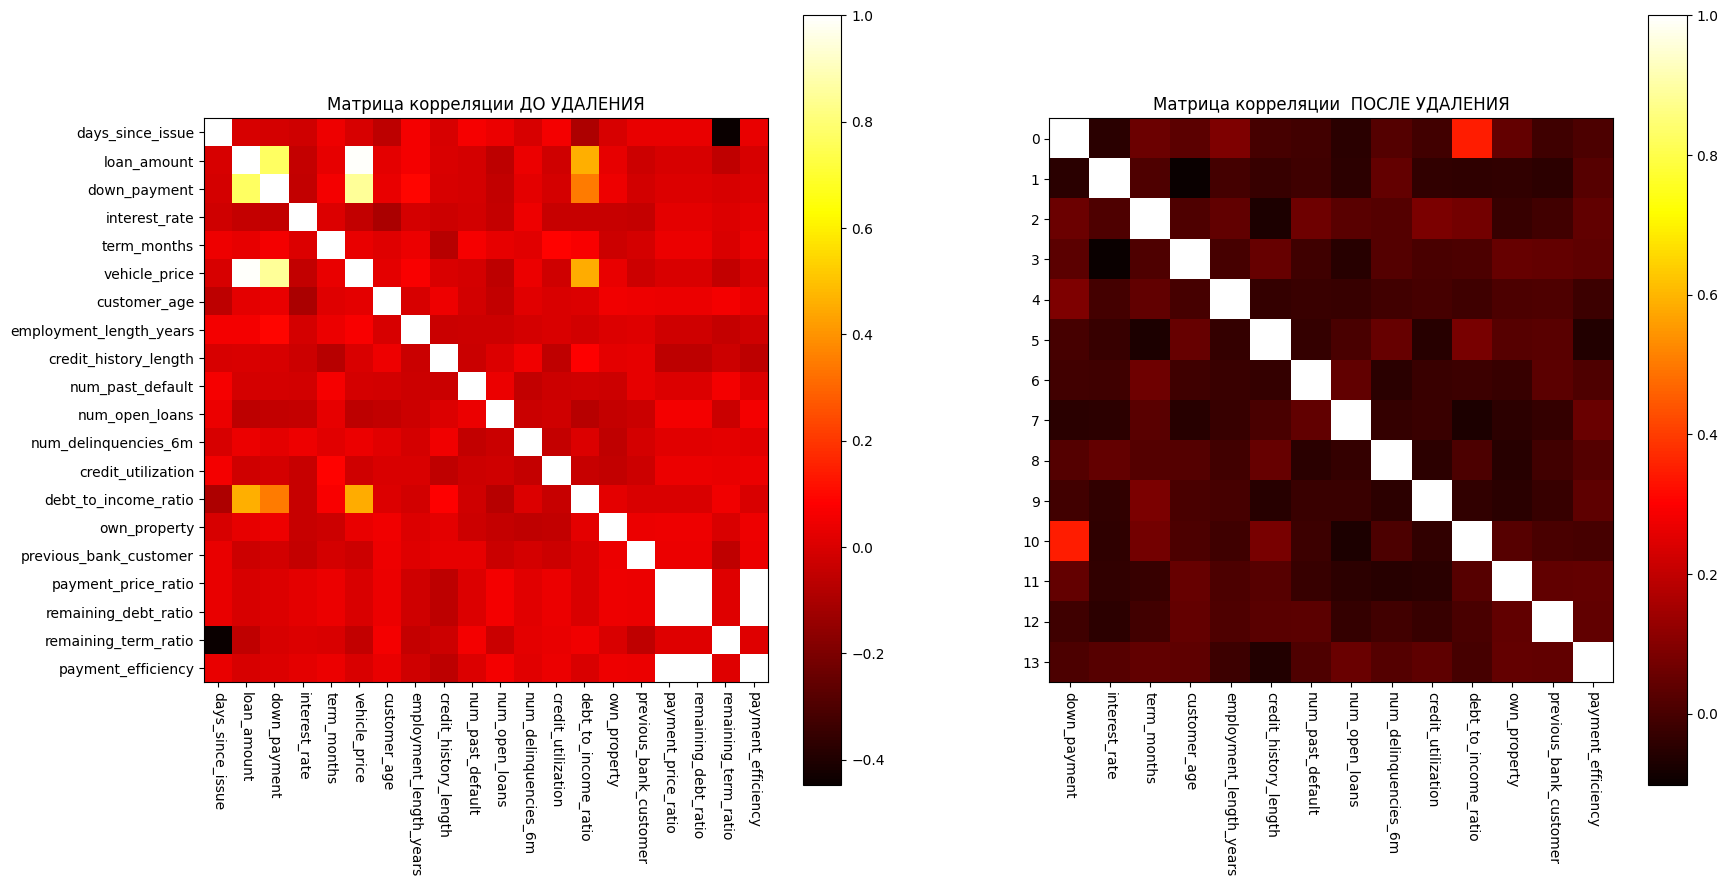

In [7]:
all_numeric = [i for i in X_train.columns if pd.api.types.is_numeric_dtype(X_train[i])]
matrix_corr = X_train[all_numeric].corr()

fig = plt.figure(figsize=(20, 10))
ax_before = fig.add_subplot(1,2,1)

BEFORE = ax_before.imshow(X=matrix_corr, cmap='hot')
ax_before.set_title("Матрица корреляции ДО УДАЛЕНИЯ")
ax_before.xaxis.set_ticks(range(0,len(X_train.columns)))
ax_before.xaxis.set_ticklabels(matrix_corr.columns)
ax_before.yaxis.set_ticks(range(0,len(X_train.columns)))
ax_before.yaxis.set_ticklabels(matrix_corr.columns)
ax_before.tick_params(axis='x', labelrotation = 270)
fig.colorbar(BEFORE)


# X_train = X_train.drop(labels=["days_since_issue", "remaining_term_ratio", "remaining_debt_ratio",
#                                "loan_amount", "vehicle_price", "term_months",
#                                "down_payment", "payment_price_ratio"], axis=1)

# X_test = X_test.drop(labels=["days_since_issue", "remaining_term_ratio", "remaining_debt_ratio",
#                              "loan_amount", "vehicle_price", "term_months",
#                              "down_payment", "payment_price_ratio"], axis=1)

X_train = X_train.drop(labels=["loan_amount", "remaining_term_ratio", 
                               "remaining_debt_ratio", 
                                "days_since_issue", "payment_price_ratio", "vehicle_price"], axis=1)

X_test = X_test.drop(labels=["loan_amount", "remaining_term_ratio", 
                               "remaining_debt_ratio", 
                                "days_since_issue", "payment_price_ratio", "vehicle_price"], axis=1)


all_numeric = [i for i in X_train.columns if pd.api.types.is_numeric_dtype(X_train[i])]
matrix_corr = X_train[all_numeric].corr()

ax_after = fig.add_subplot(1,2,2)

AFTER = ax_after.imshow(X=matrix_corr, cmap="hot")
ax_after.set_title("Матрица корреляции  ПОСЛЕ УДАЛЕНИЯ")
ax_after.xaxis.set_ticks(range(0,len(X_train.columns)))
ax_after.xaxis.set_ticklabels(matrix_corr.columns)
ax_after.yaxis.set_ticks(range(0,len(X_train.columns)))
ax_after.tick_params(axis='x', labelrotation = 270)
fig.colorbar(AFTER)

fig.show()

**2.3 Влияние признаков**

In [ ]:
best_f = SelectKBest(score_func=f_classif, k="all")
best_mutual = SelectKBest(score_func=mutual_info_classif, k="all")

f = pd.DataFrame(best_f.fit(X=X_train, y=y_train).scores_, index = X_train.columns, columns = ["f_classif"])
mutual = pd.DataFrame(best_mutual.fit(X=X_train, y=y_train).scores_, index = X_train.columns, columns = ["mutual_info_classif"])

res = pd.concat([f, mutual], axis=1).sort_values(["f_classif", "mutual_info_classif"], ascending=[False, False])

print(res)

**2.4 Анализ ковариационной матрицы**

In [ ]:
X = pd.concat([X_train, X_test], axis=0)
columns = X.columns
cov_matrix = X.cov()
values, vectors = np.linalg.eig(cov_matrix)

print(columns)

summary_disp = 0
result = []

for i in range(len(values)):
    dispersion = values[i]/values.sum()
    summary_disp += dispersion
    result_ = [round(values[i], 4), round(dispersion*100, 4), round(summary_disp*100, 4), i+1]
    result.append(result_)

dispersion_df = pd.DataFrame(result, index = range(1, len(result)+1), columns = ["eig-value", "explained dispersion(%)", "summary_dispersion(%)", "n components for sum_disp"])
loadings = pd.DataFrame(vectors, index=X.columns, columns=[f"PC{i+1}" for i in range(len(vectors))])

print(dispersion_df)

# **3.Обучение модели**

**3.1 Модель с L2**

In [ ]:
from MyRegression import MyRegression
import warnings
from sklearn.exceptions import ConvergenceWarning

# Отключаем конкретные предупреждения
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

param_grid = {"C" : np.logspace(-3, 3, 13),
              "threshold": np.arange(start=0.1, stop=1.0, step=0.2)}

grid_search = GridSearchCV(
            estimator=MyRegression(penalty="l2", random_state=47, class_weight='balanced'),
            param_grid=param_grid,
            cv=5,
            scoring="f1",
            refit=True)

grid_search.fit(X=X_train, y=y_train)

print(f"Лучший C: {grid_search.best_params_["C"]}")
print(f"Лучший threshold: {grid_search.best_params_["threshold"]}")
print(f"Лучший score(f1): {grid_search.best_score_}")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

model = grid_search.best_estimator_
print(f"accuracy: {accuracy_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"precision: {precision_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"recall: {recall_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"F1: {f1_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"AUC-ROC: {roc_auc_score(y_true=y_test, y_score=model.predict(X_test))}")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

weights = model.coef_
columns = X_train.columns
for i in range(len(weights[0])):
    print(f"{i+1} - [{columns[i]} : {weights[0][i]}]")  

**3.2 Модель без регуляризации**

In [ ]:
model = MyRegression(penalty=None, random_state=47, class_weight='balanced')
model.fit(X=X_train, y=y_train)

print(f"accuracy: {accuracy_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"precision: {precision_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"recall: {recall_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"F1: {f1_score(y_true=y_test, y_pred=model.predict(X_test))}")

# **4.Создание пайплайна**

**4.1 Загрузка данных**

In [5]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split

from MyRegression import MyRegression

import warnings
from sklearn.exceptions import ConvergenceWarning

def delete_emmisions(X:pd.DataFrame, y:pd.Series):
    df = pd.concat([X,y], axis=1)
    df = df.drop_duplicates() #Удаление дубликатов

    df1 = df[["debt_to_income_ratio", "num_past_default"]].query("debt_to_income_ratio <= 0.5 and num_past_default >= 2") #Ищем выбросы
    df = df.drop(df1.index, axis=0) #Удаляем соответствующие выбросы
    
    X = df.drop(labels = ["default"], axis=1)
    y = df["default"]
    
    return X, y

def load_data(full_path_name: str = "D:/Credit-scoring/autocredit_dataset.csv"):
    df = pd.read_csv(full_path_name)
    
    signature_features = set([
        'down_payment', 'interest_rate', 'term_months', 
        'customer_age', 'employment_length_years', 'credit_history_length', 
        'num_past_default', 'num_open_loans', 'num_delinquencies_6m', 
        'credit_utilization', 'debt_to_income_ratio', 'own_property', 
        'previous_bank_customer', "loan_amount", "vehicle_price",
        "days_since_issue", 'default'
        ])
    
    exist_features = list(signature_features.intersection(set(df.columns)))

    df = df[exist_features]
    
    df = df.fillna(np.nan)
    
    X = df.drop(labels = ["default"], axis=1)
    y = df["default"]
    
    return delete_emmisions(X, y)


**4.2 Трансформер feature engineering**

In [6]:
def combine_features(X: pd.DataFrame):
    X["remaining_debt_ratio"] = (1 - X["loan_amount"]/X["vehicle_price"]) #ПОТОМ УДАЛИТЬ
    X["remaining_term_ratio"] = (1 - X["days_since_issue"]/(X["term_months"]*30)) #ПОТОМ УДАЛИТЬ
    X["payment_efficiency"] = X["remaining_debt_ratio"]/X["remaining_term_ratio"]
    
    X = X.drop(labels=[
                       "remaining_debt_ratio", "remaining_term_ratio",
                       "loan_amount", "vehicle_price", 
                       "days_since_issue", "term_months"
                      ], axis = 1)
    
    return X


**4.3 Создание собственных scaler и imputer**

In [7]:
def my_stdscaler(X:pd.DataFrame):
    scaler = StandardScaler()
    numpy_X = scaler.fit_transform(X=X)
    X = pd.DataFrame(data=numpy_X, columns=X.columns)
    return X

def my_imputer(X:pd.DataFrame):
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
    numpy_X = imputer.fit_transform(X=X)
    
    X = pd.DataFrame(data = numpy_X, columns = X.columns)
    return X

**4.4 Соединение всех частей пайплайна + метрики**

In [8]:
X, y = load_data(full_path_name="D:/Credit-scoring/autocredit_dataset.csv") #Запуск на ноутбуке
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

emmisions = FunctionTransformer(func=delete_emmisions, validate=False)
imputer = FunctionTransformer(func=my_imputer, validate=False)
STDscaler = FunctionTransformer(func=my_stdscaler, validate=False)
create_features = FunctionTransformer(func=combine_features, validate=False)

pipeline_model = Pipeline(steps=[
    ("impute", imputer),
    ("scaler", STDscaler),
    ("features" , create_features),
    ("model", MyRegression(penalty="l2", random_state=47, class_weight='balanced'))
])


warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

param_grid = {"model__C" : np.logspace(-3, 3, 13),
              "model__threshold": np.arange(start=0.1, stop=1.0, step=0.2)}

grid_search = GridSearchCV(
            estimator=pipeline_model,
            param_grid=param_grid,
            cv=5,
            scoring="f1",
            refit=True,
            n_jobs=-1,  # параллельные вычисления
            verbose=1   # прогресс-бар
)

grid_search.fit(X=X_train, y=y_train)

print(f"Лучший C: {grid_search.best_params_["model__C"]}")
print(f"Лучший threshold: {grid_search.best_params_["model__threshold"]}")
print(f"Лучший score(f1): {grid_search.best_score_}")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

model = grid_search.best_estimator_
print(f"accuracy: {accuracy_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"precision: {precision_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"recall: {recall_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"F1: {f1_score(y_true=y_test, y_pred=model.predict(X_test))}")
print(f"AUC-ROC: {roc_auc_score(y_true=y_test, y_score=model.predict(X_test))}")


Fitting 5 folds for each of 65 candidates, totalling 325 fits
Лучший C: 3.1622776601683795
Лучший threshold: 0.5000000000000001
Лучший score(f1): 0.3343595121133658
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
accuracy: 0.6766666666666666
precision: 0.21100917431192662
recall: 0.6764705882352942
F1: 0.32167832167832167
AUC-ROC: 0.6765811587793013
